In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection and Processing

In [2]:
titanic_train = pd.read_csv("D:/data science/train.csv")


printing 5 rows of column

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


No. of rows and columns

In [4]:
titanic_train.shape

(891, 12)

In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We get that there are three columns which having missing values (Age, Cabin,Embarked)

# check the no of missing values in each column

In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# handling the missing values

droping the Cabin column

In [7]:
titanic_train = titanic_train.drop(["Cabin"], axis=1)

As we can't drop the Age column we are replacing the missing values in age column with the mean

In [8]:
titanic_train.fillna(titanic_train['Age'].mean(), inplace= True)

As the Embarked column is the categorical column we are replacing the NA values in Embarked with MODE

In [9]:
titanic_train["Embarked"].mode()

0    S
dtype: object

In [10]:
titanic_train["Embarked"].value_counts()

S                    644
C                    168
Q                     77
29.69911764705882      2
Name: Embarked, dtype: int64

we found S is mode of Embarked column

In [11]:
titanic_train.fillna(titanic_train["Embarked"].mode()[0], inplace= True)

checking again the null values

In [12]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data analysis

In [13]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# check the person survived

In [14]:
titanic_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

making the countplot of Survived

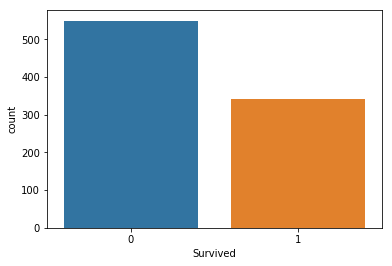

In [15]:
sns.countplot('Survived', data=titanic_train)

In [16]:
titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

making the countplot of Sex

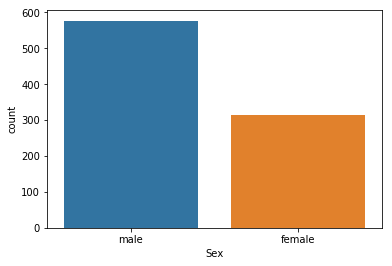

In [17]:
sns.countplot('Sex', data=titanic_train)

# No of Survived with respect to Gender

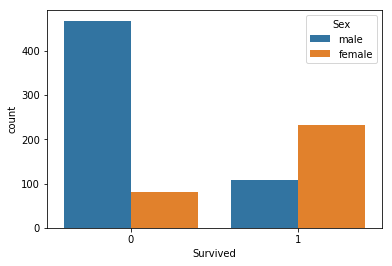

In [18]:
sns.countplot('Survived',hue= 'Sex', data=titanic_train)

making the countplot of Pclass

In [19]:
titanic_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# No of Survived with respect to Gender

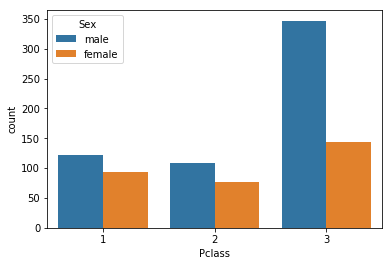

In [20]:
sns.countplot('Pclass',hue= 'Sex', data=titanic_train)

# Encoding the categorical column

In [21]:
titanic_train.replace({"Sex":{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [22]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


In [23]:
x= titanic_train.drop(["PassengerId","Name","Ticket","Survived"], axis=1)
y= titanic_train["Survived"]

In [24]:
print(x)
print(y)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
0         3    0  22.000000      1      0    7.2500       0.0
1         1    1  38.000000      1      0   71.2833       1.0
2         3    1  26.000000      0      0    7.9250       0.0
3         1    1  35.000000      1      0   53.1000       0.0
4         3    0  35.000000      0      0    8.0500       0.0
5         3    0  29.699118      0      0    8.4583       2.0
6         1    0  54.000000      0      0   51.8625       0.0
7         3    0   2.000000      3      1   21.0750       0.0
8         3    1  27.000000      0      2   11.1333       0.0
9         2    1  14.000000      1      0   30.0708       1.0
10        3    1   4.000000      1      1   16.7000       0.0
11        1    1  58.000000      0      0   26.5500       0.0
12        3    0  20.000000      0      0    8.0500       0.0
13        3    0  39.000000      1      5   31.2750       0.0
14        3    1  14.000000      0      0    7.8542       0.0
15      

# splitting the data into train and test

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

# model training

Logestic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [27]:
model1.fit(x_train, y_train)

C:\Users\swapnil\anaconda3\New folder\new anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [30]:
y_pred = model1.predict(x_test)

# ModelEvaluation 
(Accuracy score)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[91  9]
 [30 49]]


0.7821229050279329